In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [126]:
df =pd.read_csv('data/stud.csv')

In [127]:
df.head(
)


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [129]:
df.isnull().any()

gender                         False
race_ethnicity                 False
parental_level_of_education    False
lunch                          False
test_preparation_course        False
math_score                     False
reading_score                  False
writing_score                  False
dtype: bool

In [130]:
df.duplicated().sum()

np.int64(0)

In [131]:
df.nunique()


gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [132]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [133]:
num_features =[feature for feature in df.columns if df[feature].dtype != 'O']
cat_features =[feature for feature in df.columns if df[feature].dtype == 'O']

print("we have {} numerical features :{}".format(len(num_features),num_features))
print("we have {} categorical features :{}".format(len(cat_features),cat_features))

we have 3 numerical features :['math_score', 'reading_score', 'writing_score']
we have 5 categorical features :['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [134]:
df['total_score'] =df['reading_score']+df['math_score']+df['writing_score']
df['average'] = df['total_score']/3

In [135]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [136]:
reading_full =df[df['reading_score']==100]['average'].count()
writing_full =df[df['writing_score']==100]['average'].count()
math_full =df[df['math_score']==100]['average'].count()

print(f'no of students to get full marks in maths = {math_full}')
print(f'no of students to get full marks in writing ={writing_full}')
print(f'no of students to get full marks in reading ={ reading_full}')

no of students to get full marks in maths = 7
no of students to get full marks in writing =14
no of students to get full marks in reading =17


In [137]:
reading_less =df[df['reading_score']<=20]['average'].count()
writing_less =df[df['writing_score']<=20]['average'].count()
math_less =df[df['math_score']<=20]['average'].count()

print(f'no of students to get less than 20 marks in maths = {math_less}')
print(f'no of students to get less than 20 marks in writing {writing_less}')
print(f'no of students to get less than 20 marks in reading ={ reading_less}')

no of students to get less than 20 marks in maths = 4
no of students to get less than 20 marks in writing 3
no of students to get less than 20 marks in reading =1


<Axes: xlabel='total_score', ylabel='Count'>

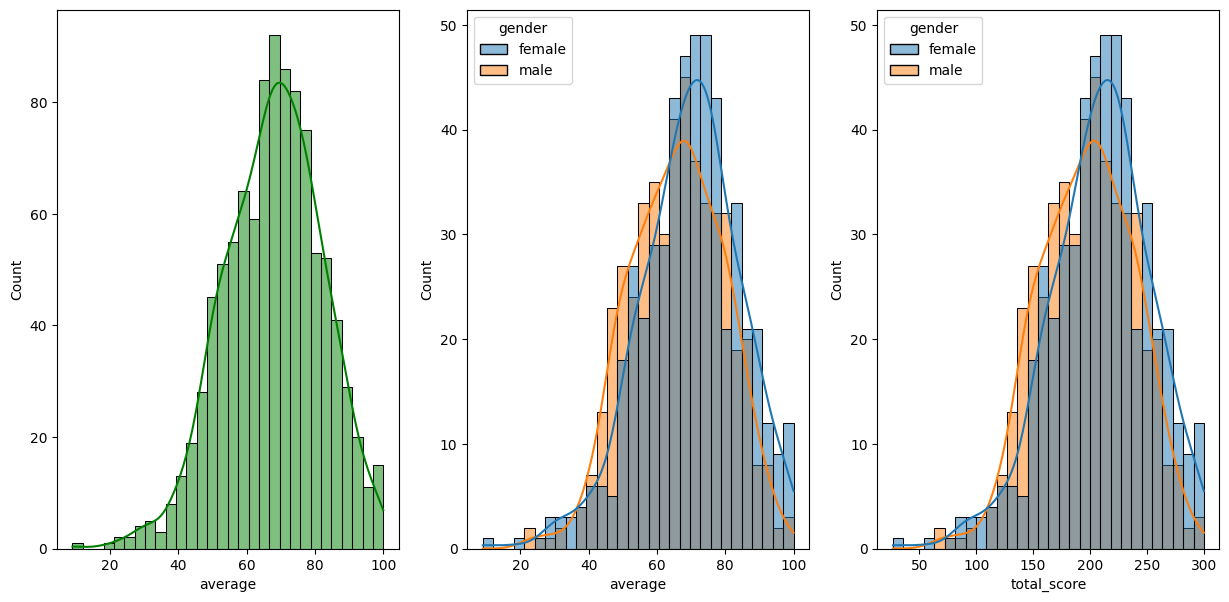

In [138]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))

# First subplot
sns.histplot(data=df, x='average', bins=30, kde=True, color='g', ax=axs[0])

# Second subplot
sns.histplot(data=df, x='average', bins=30, kde=True, hue  ='gender',color='b', ax=axs[1])  # Example

sns.histplot(data=df, x='total_score', bins=30, kde=True, hue  ='gender',color='b', ax=axs[2]) 

girls are performim=ng better than guys


<Axes: xlabel='average', ylabel='Count'>

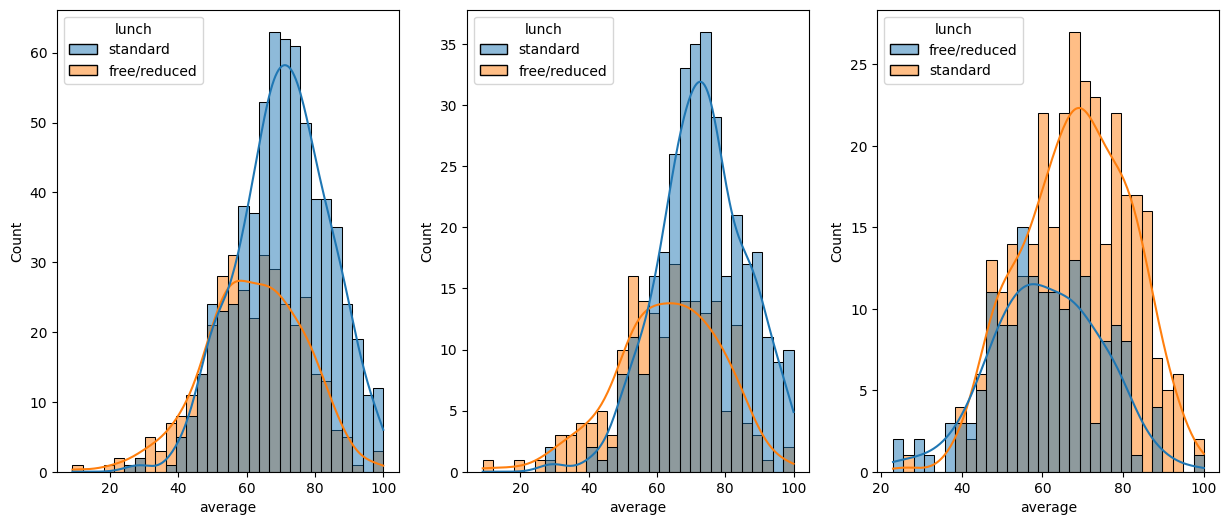

In [139]:
fig,axs =plt.subplots(1,3, figsize =(15,6))
sns.histplot(data = df,x= 'average',bins = 30,kde =True,ax=axs[0],hue ='lunch')
sns.histplot(data = df[df.gender=='female'],x= 'average',bins = 30,kde =True,ax=axs[1],hue ='lunch')
sns.histplot(data = df[df.gender=='male'],x= 'average',bins = 30,kde =True,ax=axs[2],hue ='lunch')


standard lunch helps well be it male or female student


<Axes: xlabel='average', ylabel='Count'>

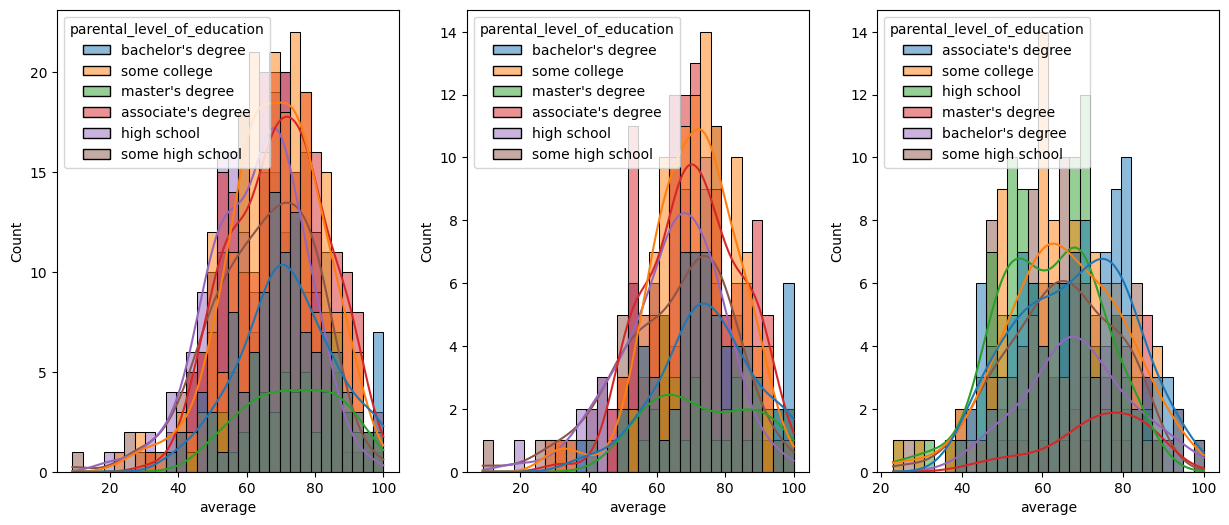

In [140]:
fig,axs =plt.subplots(1,3, figsize =(15,6))
sns.histplot(data = df,x= 'average',bins = 30,kde =True,ax=axs[0],hue ='parental_level_of_education')
sns.histplot(data = df[df.gender=='female'],x= 'average',bins = 30,kde =True,ax=axs[1],hue ='parental_level_of_education')
sns.histplot(data = df[df.gender=='male'],x= 'average',bins = 30,kde =True,ax=axs[2],hue ='parental_level_of_education')

no such impact by parents education
the marks remained more or less same for female students
but the male students whose parents have masters or associate degree ,their marks increased


<Axes: xlabel='average', ylabel='Count'>

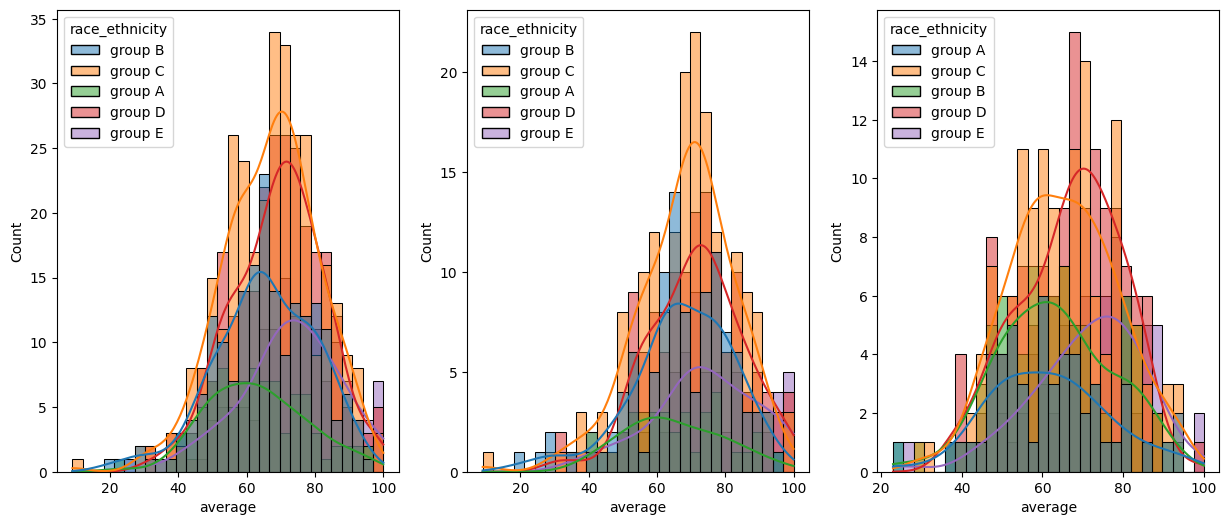

In [141]:
fig,axs =plt.subplots(1,3, figsize =(15,6))
sns.histplot(data = df,x= 'average',bins = 30,kde =True,ax=axs[0],hue ='race_ethnicity')
sns.histplot(data = df[df.gender=='female'],x= 'average',bins = 30,kde =True,ax=axs[1],hue ='race_ethnicity')
sns.histplot(data = df[df.gender=='male'],x= 'average',bins = 30,kde =True,ax=axs[2],hue ='race_ethnicity')

students of group a and group b have performed poor in exams irrespective of male or female

<Axes: xlabel='average', ylabel='Count'>

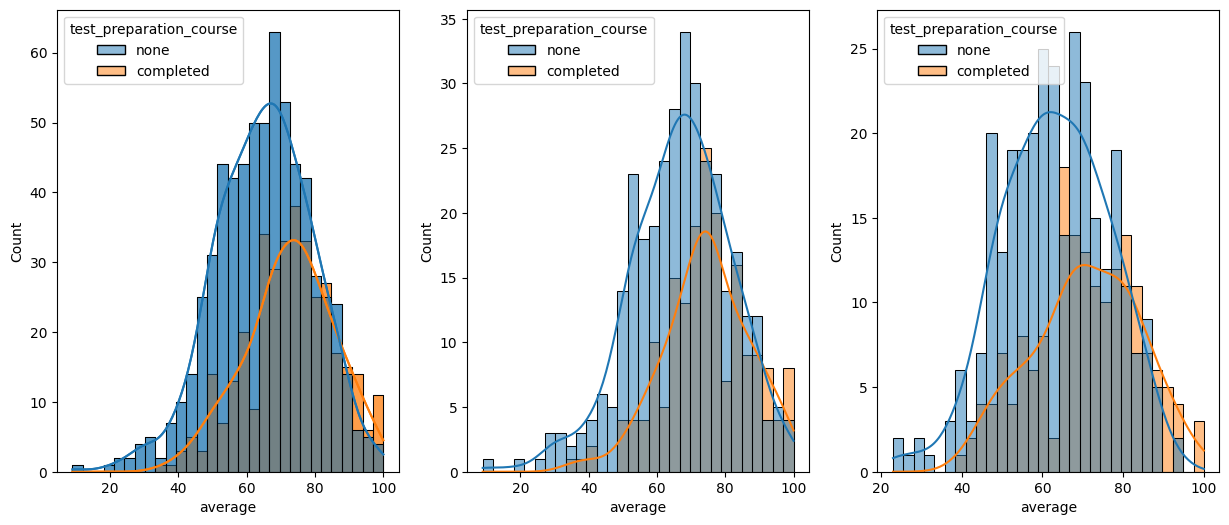

In [142]:
fig,axs =plt.subplots(1,3, figsize =(15,6))
sns.histplot(data = df,x= 'average',bins = 30,kde =True,ax=axs[0],hue ='test_preparation_course')
sns.histplot(data = df,x= 'average',bins = 30,kde =True,ax=axs[0],hue ='test_preparation_course')
sns.histplot(data = df[df.gender=='female'],x= 'average',bins = 30,kde =True,ax=axs[1],hue ='test_preparation_course')
sns.histplot(data = df[df.gender=='male'],x= 'average',bins = 30,kde =True,ax=axs[2],hue ='test_preparation_course')

as such no impact or increase in marks if you complete your preperation course but its beneficial to do it


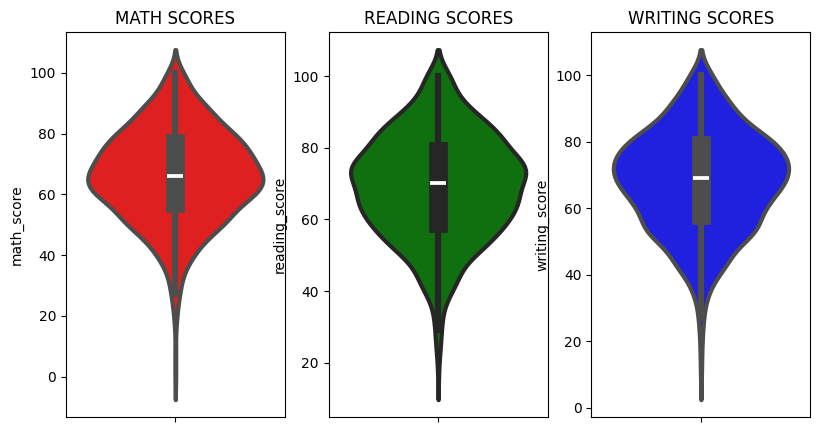

In [143]:
plt.figure(figsize=(13,5))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

maximum students have a math score btw 60-80
for reading and writing max score = 50-80


(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

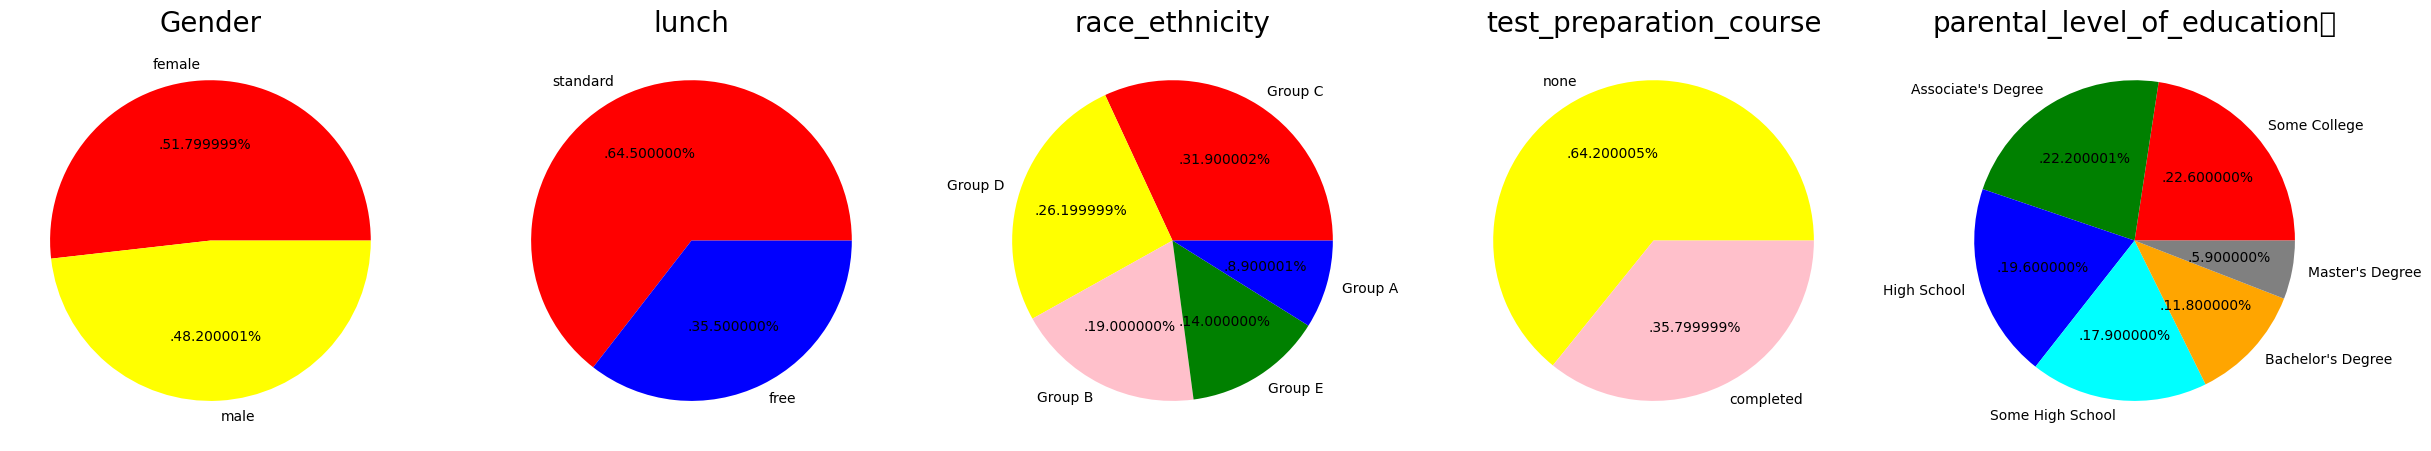

In [144]:
plt.rcParams['figure.figsize'] =(30,12)
plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels ='female', 'male'
color = ['red','yellow']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['lunch'].value_counts()
labels ='standard','free'
color = ['red','blue']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['race_ethnicity'].value_counts()
labels ='Group C', 'Group D','Group B','Group E','Group A'
color = ['red','yellow','pink','green','blue']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('race_ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['test_preparation_course'].value_counts()
labels ='none','completed'
color = ['yellow','pink']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('test_preparation_course', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('parental_level_of_education	', fontsize = 20)
plt.axis('off')


no of males and females is almost equal
more student prefer standard lunch
no of students of group c are more than other groups and lesser students in group a and e
maximum students didnt complete the test course
no of students who's parental education is from some college is highest followed by parenst with associate's degree ..no of students with parents having masters degree is the least
students with std lunch have more marks
students who completed test course gain more marks
group e has scored highest marks and group a has scored lowest marks
students with parents having bachelors degree score higher
female students have more marks than male


In [146]:
print(df.dtypes)



gender                          object
race_ethnicity                  object
parental_level_of_education     object
lunch                           object
test_preparation_course         object
math_score                       int64
reading_score                    int64
writing_score                    int64
total_score                      int64
average                        float64
dtype: object


In [151]:
gender_group = df.groupby('gender')[['math_score', 'reading_score', 'writing_score', 'total_score', 'average']].mean()
print(gender_group)
female_score =[gender_group['average'][0],gender_group['math_score'][0]]
male_score =[gender_group['average'][1],gender_group['math_score'][1]]


        math_score  reading_score  writing_score  total_score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


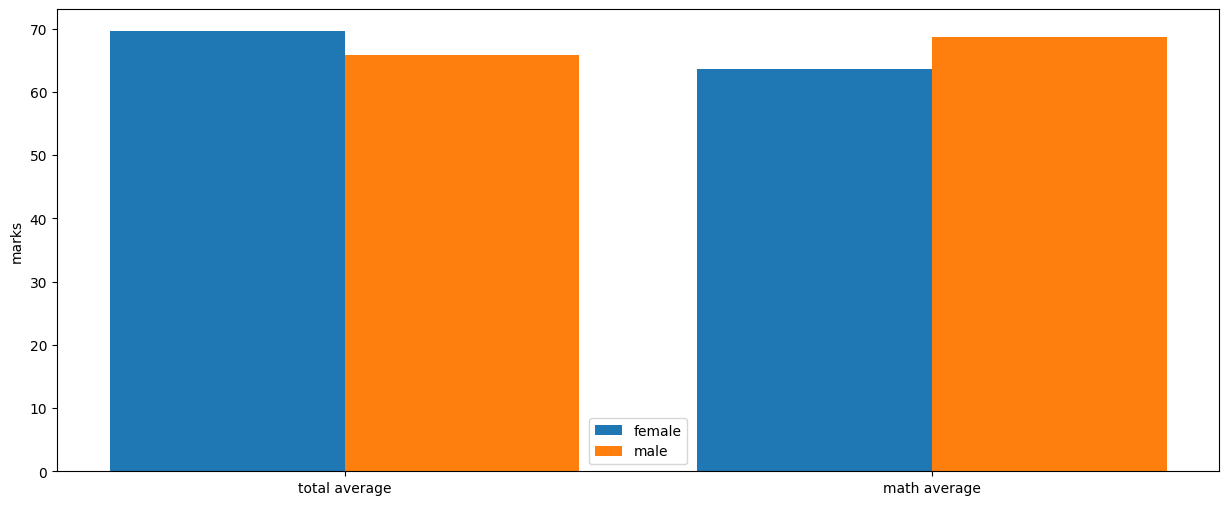

In [158]:
plt.figure(figsize=(15,6))
x =['total average','math average']
x_axis = np.arange(len(x))
plt.bar(x_axis-0.2,female_score,0.4,label='female')
plt.bar(x_axis+0.2,male_score,0.4,label='male')
plt.ylabel('marks')
plt.xticks(x_axis,x)
plt.legend()
plt.show()

females performed better than males
males however got higher marks in maths

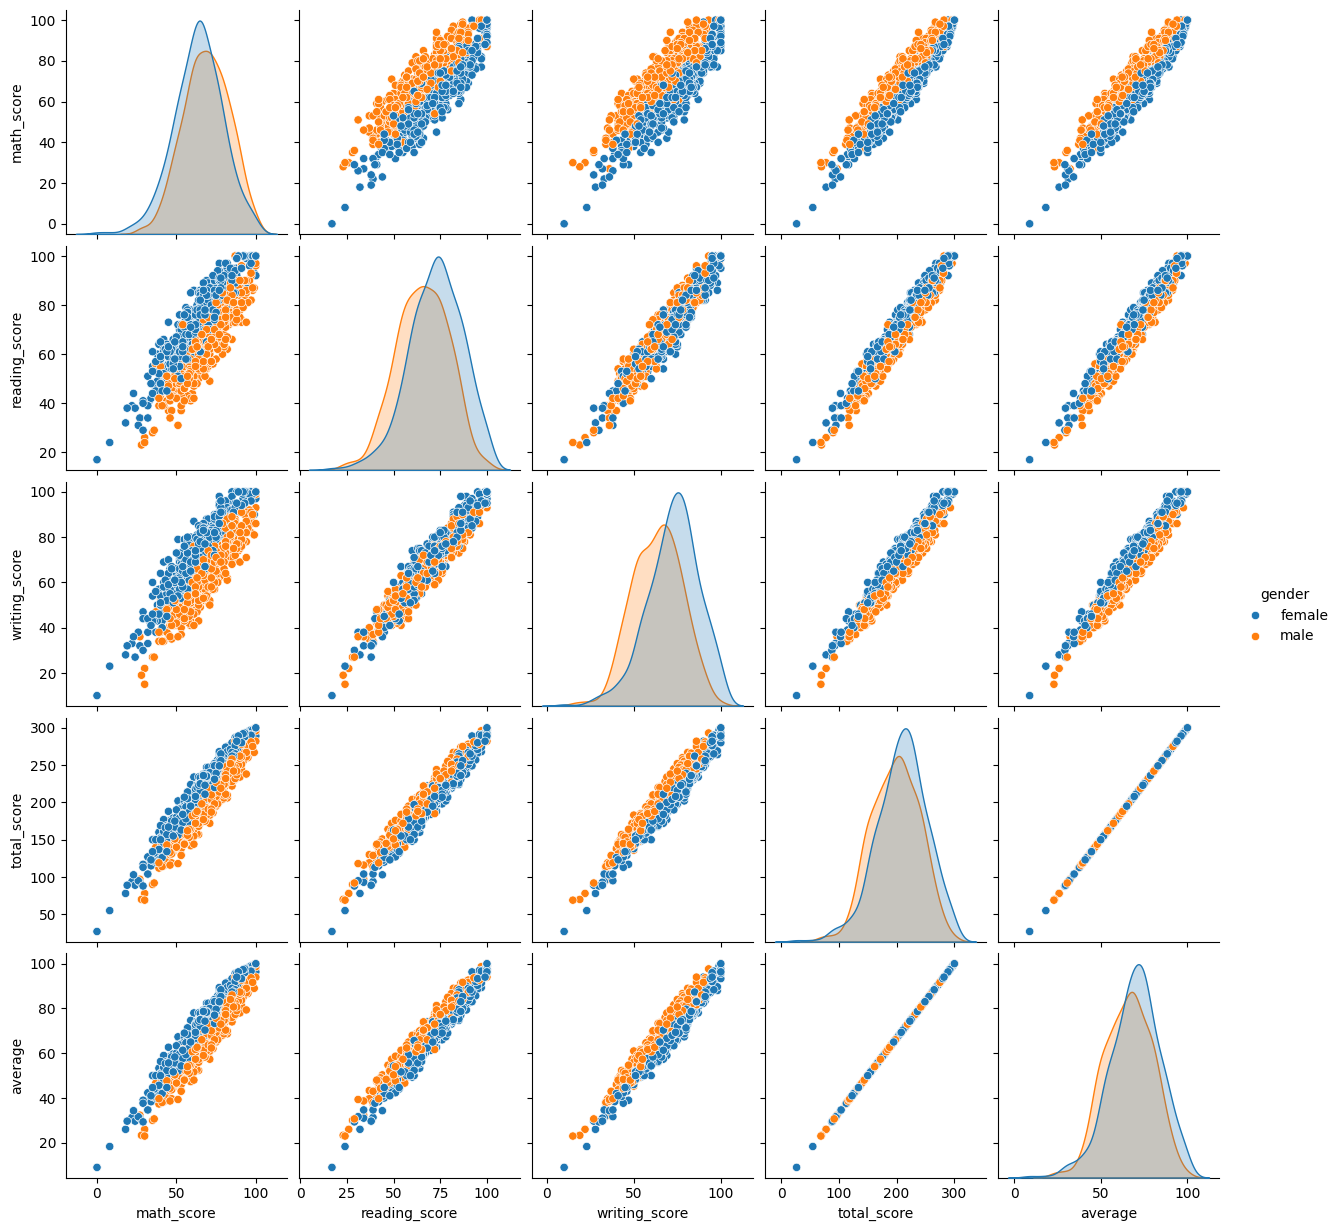

In [159]:
sns.pairplot(df,hue = 'gender')
plt.show()

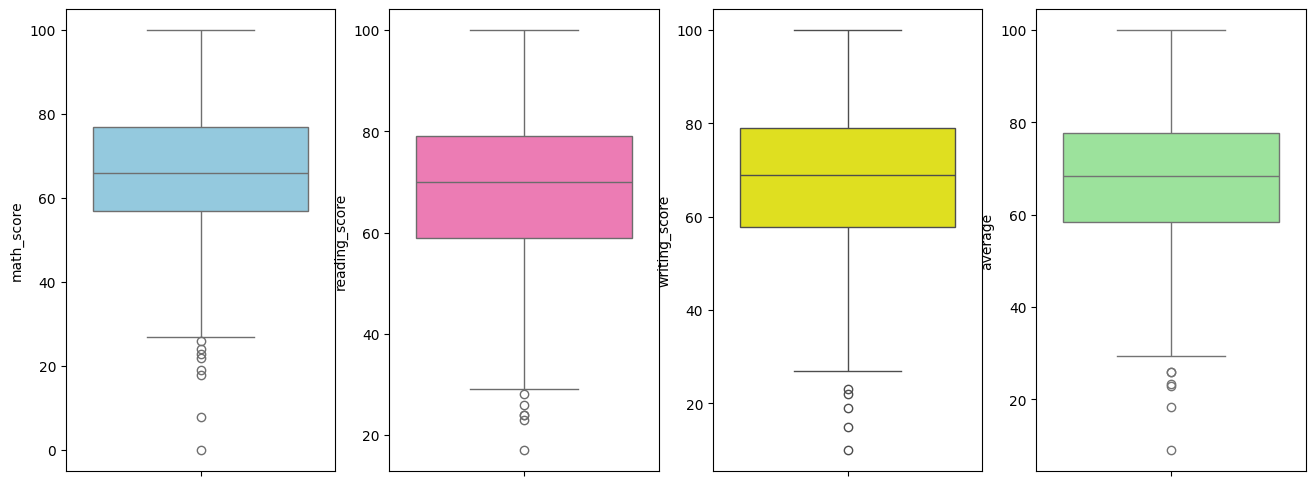

In [164]:
fig,axs =plt.subplots(1,4,figsize=(16,6))

sns.boxplot(df['math_score'],color='skyblue',ax= axs[0])

sns.boxplot(df['reading_score'],color='hotpink',ax=axs[1])

sns.boxplot(df['writing_score'],color='yellow',ax=axs[2])

sns.boxplot(df['average'],color='lightgreen',ax=axs[3])
plt.show()